In [18]:
exec(open("initKeras.py").read())

In [19]:
# model numbers to retrain, set to false or blank if you want to retrain all the models in DoodleModels. Strictly a list of integers
trainOnlyModels = [ 6, 7, 8 ]
saveModels = True

# #data preparation
inputDir = "C:\\tim209\\filtered by category\\output\\*.npy"
modelDirectory = "F:\\myProjects\\tim209\\doodle\\savedModels\\"
modelGraphDirectory = "F:\\myProjects\\tim209\\doodle\\experiment results\\"
dataUtils = dataUtils( inputDir )
dataUtils.process()

Processing aircraft carrier C:\tim209\filtered by category\output\aircraft carrier.npy
Observation #: 20000
label hot vectors #: 20000
Processing airplane C:\tim209\filtered by category\output\airplane.npy
Observation #: 20000
label hot vectors #: 20000
Processing alarm clock C:\tim209\filtered by category\output\alarm clock.npy
Observation #: 20000
label hot vectors #: 20000
Processing ambulance C:\tim209\filtered by category\output\ambulance.npy
Observation #: 20000
label hot vectors #: 20000
Processing angel C:\tim209\filtered by category\output\angel.npy
Observation #: 20000
label hot vectors #: 20000
Processing animal migration C:\tim209\filtered by category\output\animal migration.npy
Observation #: 20000
label hot vectors #: 20000
Processing ant C:\tim209\filtered by category\output\ant.npy
Observation #: 20000
label hot vectors #: 20000
Processing anvil C:\tim209\filtered by category\output\anvil.npy
Observation #: 20000
label hot vectors #: 20000
Processing apple C:\tim209\fil

In [20]:
(images, labels, classToLevels ) = dataUtils.getData()
(imagesR, labelsR, classToLevelsR ) = dataUtils.getRandomizedData()
images = dataUtils.reshapeDataForKeras( images )
imagesR = dataUtils.reshapeDataForKeras( imagesR )

(200000, 784) (200000, 10) {'aircraft carrier': 0, 'airplane': 1, 'alarm clock': 2, 'ambulance': 3, 'angel': 4, 'animal migration': 5, 'ant': 6, 'anvil': 7, 'apple': 8, 'arm': 9}


In [21]:
doodleModels = DoodleModels(images, labels)

train X: (160000, 28, 28, 1)
test X: (40000, 28, 28, 1)
train Y: (160000, 10)
test Y: (40000, 10)


In [ ]:
epochSize = 3
batchSize = 500
learningRate = 0.01
confStr = "_e" + str( epochSize ) + "_b" + str( batchSize ) + "_lr" + str( learningRate ) + " "
histories = []
for i in range( doodleModels.numberOfAvailableModels ):
    
    modelNo = i + 1
    
    #1 filter if needed
    if type( trainOnlyModels ) == list and len( trainOnlyModels ) > 0 and modelNo not in trainOnlyModels:
        print( "Skipping model #", modelNo )
        continue
        
    #2 get and train model
    model = doodleModels.getModel( modelNo, learningRate )
    history, testLoss, testAcc = doodleModels.runModel( model, epochSize, batchSize )
    histories.append( ( model, history, testLoss, testAcc ) )
    
    #3 save model performance plot
    plotSavePath = modelGraphDirectory + model.name + confStr + ".png"
    doodleModels.plotModelTrainPerformance( model, plotSavePath )
    
    #4 save trained model
    if saveModels == True:
        modelPath = modelDirectory + model.name + confStr + "_Pa.h5"
        doodleModels.saveModelAndHistory( model, modelPath )


Skipping model # 1
Skipping model # 2
Skipping model # 3
Skipping model # 4
Skipping model # 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 3, 3, 64)          36928     
_______________________________________________

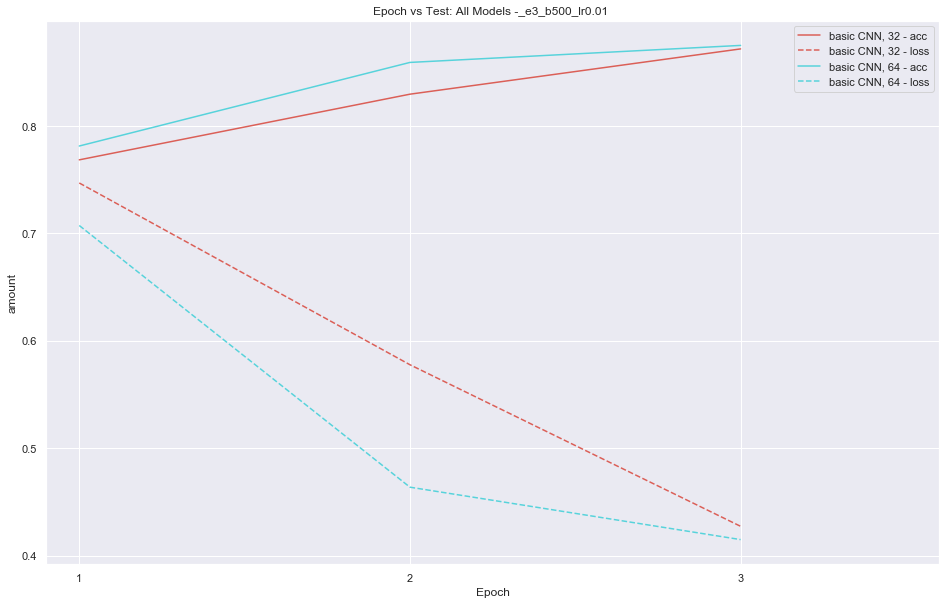

<Figure size 1152x720 with 0 Axes>

In [17]:
#print all model graph
plt.close()
colorPalette = sns.color_palette("hls", len( histories ) )
colorIndex = 0
for ( model, history, testLoss, testAcc ) in histories:
    epochX = np.arange( len( history.epoch ) ) + 1
    fig = plt.figure( figsize=( 16, 10 ) )
    plt.figure(1)
    
    if 'val_loss' in history.history:
        plt.plot( epochX, history.history['val_categorical_accuracy'], color = colorPalette[ colorIndex] , label = model.name + " - acc" )
        plt.plot( epochX, history.history['val_loss'], color = colorPalette[ colorIndex], label = model.name + " - loss", linestyle = '--' )
    else:
        plt.plot( epochX, history.history['categorical_accuracy'], color = colorPalette[ colorIndex] , label = model.name + " - acc" )
        plt.plot( epochX, history.history['loss'], color = colorPalette[ colorIndex], label = model.name + " - loss", linestyle = '--' )

    plt.title( 'Epoch vs Test: All Models -' + confStr )
    plt.xlabel( "Epoch" )
    plt.ylabel( "amount" )
    plt.xticks( epochX )
    plt.xlim( right = len( history.epoch ) * 1.2 )
    plt.legend()
    colorIndex = colorIndex + 1

allPath =  modelGraphDirectory + "all_" + confStr + datetime.now().strftime( "%Y-%M-%d %Hh%Mm%Ss" ) + ".png"
plt.savefig( allPath )

In [ ]:
allPath

In [ ]:
round( model.optimizer.get_config()['lr'], 4)

In [ ]:
model.optimizer.get_config()

In [ ]:
round(0.0001, 4)